# Reconstrucción de señales por medio de ZOH

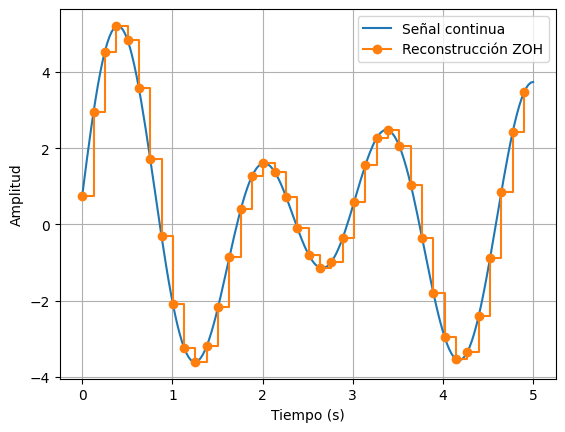

In [42]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 200)
w = 4 * np.pi / 5
y = np.sin(w*t) +  1.5 * np.sin(1.2*w*t + 0.1) + 3 * np.sin(1.6*w*t + 0.2)
plt.plot(t, y,label='Señal continua')

idx_sampling = np.arange(0, len(t), 5)
plt.step(t[idx_sampling], y[idx_sampling], 'o-', where='post',label='Reconstrucción ZOH')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(); plt.legend()
plt.show()



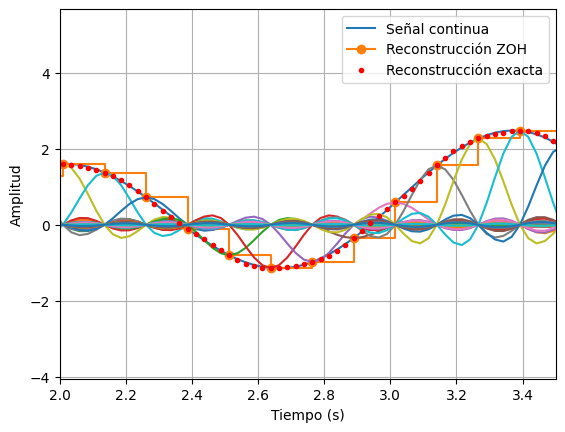

In [52]:
# Reconstrucción exacta

T = t[idx_sampling[1]] - t[idx_sampling[0]]

plt.plot(t, y, label='Señal continua')
#plt.plot(t[idx_sampling], y[idx_sampling], 'o', label='Muestras')
plt.step(t[idx_sampling], y[idx_sampling], 'o-', where='post',label='Reconstrucción ZOH')


for i in range(len(idx_sampling)-1):
    tk = t[idx_sampling[i]]
    yk = y[idx_sampling[i]]
    y_sinc = yk * np.sinc((t - tk) / T)
    y_reconstruida = y_sinc if i == 0 else y_reconstruida + y_sinc
    
    plt.plot(t, y_sinc)

plt.plot(t, y_reconstruida, '.', label='Reconstrucción exacta', color='red')

plt.xlim([2, 3.5])
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

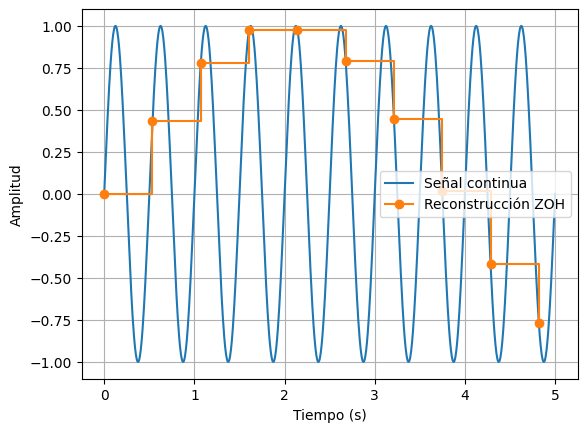

In [33]:
t = np.linspace(0, 5, 1000)
w = 20 * np.pi / 5
y = np.sin(w*t) 
plt.plot(t, y,label='Señal continua')

idx_sampling = np.arange(0, len(t), 107)
plt.step(t[idx_sampling], y[idx_sampling], 'o-', where='post',label='Reconstrucción ZOH')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(); plt.legend()
plt.show()



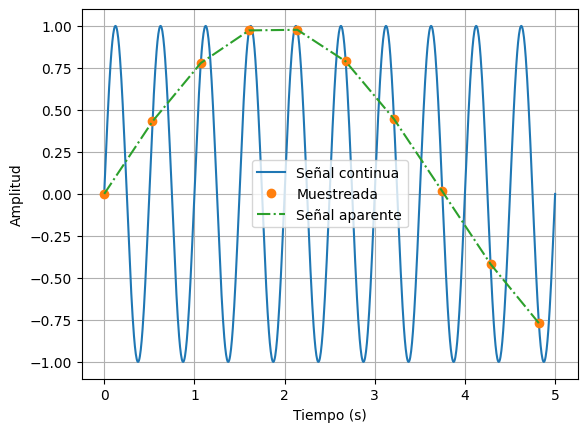

In [37]:
t = np.linspace(0, 5, 1000)
w = 20 * np.pi / 5
y = np.sin(w*t) 
plt.plot(t, y,label='Señal continua')

idx_sampling = np.arange(0, len(t), 107)
plt.plot(t[idx_sampling], y[idx_sampling], 'o', label='Muestreada')
plt.plot(t[idx_sampling], y[idx_sampling], '-.', label='Señal aparente')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(); plt.legend()
plt.show()



Sistema de tiempo continuo <LinearIOSystem>: sys[52]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[0. 1.]
     [0. 0.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]

Muestreo cada 50.0 samples
Sistema de tiempo discreto <LinearIOSystem>: sys[52]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[1.  0.1]
     [0.  1. ]]

B = [[0.005]
     [0.1  ]]

C = [[1. 0.]]

D = [[0.]]

dt = 0.1



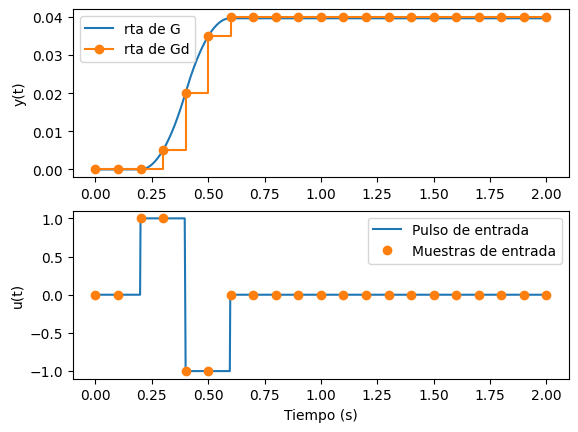

In [85]:
# Respuesta al pulso de un doble integrador

import control as ctrl

t = np.linspace(0, 2, 1001)
u = np.zeros_like(t)
u[100:199] = 1  # Pulso unitario entre t=1
u[200:299] = -1  # Pulso unitario entre t=1

G = ctrl.ss([[0, 1], [0, 0]],[[0], [1]], [[1, 0]], [[0]])
print("Sistema de tiempo continuo",G)

T = 0.1
N = T/(t[1]-t[0])
print(f'Muestreo cada {N} samples')

Gd = ctrl.c2d(G,Ts=T, method='zoh')
print("Sistema de tiempo discreto",Gd)


uk = u[0:len(u):int(N)]  # Muestreo cada 10 muestras

# Respuesta al impulso
t, y = ctrl.forced_response(G, t, U=u)
t_k, y_k = ctrl.forced_response(Gd, U=uk)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y, label='rta de G')
plt.step(t_k, y_k, 'o-',where='post',label='rta de Gd')
plt.ylabel('y(t)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, u, label='Pulso de entrada')
plt.step(t_k, uk, 'o',  where='post',label='Muestras de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('u(t)')
plt.legend()

